# Loading Data from CSVs

In [1]:
# Representing csv as a list of rows

#option 1: Each ro is a list
csv = [
        ["A1", "A2", "A3"],
        ["B1", "B2", "B3"]
    ]

#option 2: Each row is a dictionary
csv = [
    {"name1" : "A1", "name2" : "A2", "name3" : "A3"},
    {"name1" : "B1", "name2" : "B2", "name3" : "B3"}
    ]

In [2]:
import unicodecsv

enrollments = []
f = open("enrollments.csv", "rb")
reader = unicodecsv.DictReader(f)

for row in reader:
    enrollments.append(row)
    
f.close()

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [3]:
import unicodecsv

enrollments = []
with open("enrollments.csv", "rb") as f:
    reader = unicodecsv.DictReader(f)

    for row in reader:
        enrollments.append(row)

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [4]:
enrollments = []

with open("enrollments.csv", "rb") as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [5]:
daily_engagement = []

with open("daily_engagement.csv", "rb") as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [6]:
project_submissions = []

with open("project_submissions.csv", "rb") as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
    
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [7]:
import unicodecsv

def read_csv(filename):
    with open(filename, "rb") as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv("enrollments.csv")
daily_engagement = read_csv("daily_engagement.csv")
project_submissions = read_csv("project_submissions.csv")

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


# Fixing Data Types

In [8]:
from datetime import datetime as dt

def parse_date(date):
    if date == "":
        return None
    else:
        return dt.strptime(date, "%Y-%m-%d")
    
def parse_maybe_int(i):
    if i == "":
        return None
    else :
        return int(float(i))

In [9]:
#clean up data type in the enrollments table
for enrollment in enrollments:
    enrollment["cancel_date"] = parse_date(enrollment["cancel_date"])
    enrollment["days_to_cancel"] = parse_maybe_int(enrollment["days_to_cancel"])
    enrollment["is_canceled"] = enrollment["is_canceled"] == "True"
    enrollment["is_udacity"] = enrollment["is_udacity"] == "True"
    enrollment["join_date"] = parse_date(enrollment["join_date"])
    
enrollments[0]    

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [10]:
# clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record["lessons_completed"] = parse_maybe_int(engagement_record["lessons_completed"])
    engagement_record["num_courses_visited"] = parse_maybe_int(engagement_record["num_courses_visited"])
    engagement_record["projects_completed"] = parse_maybe_int(engagement_record["projects_completed"])
    engagement_record["total_minutes_visited"] = float(engagement_record["total_minutes_visited"])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [11]:
# Clean up the data type in the submision table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

#Investigating the data 

In [12]:
# Removing an element from the daily daily_engagement table
for engagement_record in daily_engagement:
    engagement_record["account_key"] = engagement_record["acct"]
    del engagement_record["acct"]

In [13]:
def unique(data, index):
    unique = []
    for i in data:
        if i[index] in unique:
            unique
        else:
             unique.append(i[index])
    print("The unique number is: ", len(unique))

# number of rows and unique student in enrollment table
print("The length is: ", len(enrollments))
unique(enrollments, "account_key")

# number of rows and unique student in engagement table
print("The length is: ", len(daily_engagement))
unique(daily_engagement, "account_key")

#number of rows and unique student in submission table
print("The length is: ", len(project_submissions))
unique(project_submissions, "account_key")


The length is:  1640
The unique number is:  1302
The length is:  136240
The unique number is:  1237
The length is:  3642
The unique number is:  743


In [14]:
def uniqueSet(data):
    uniqueSet = set()
    for i in data:
        uniqueSet.add(i["account_key"])
    return (uniqueSet)
    
    
a = uniqueSet(enrollments)
b = uniqueSet(daily_engagement)
c = uniqueSet(project_submissions)




In [15]:
num_problem_students = 0

for enrollment in enrollments:
    student  = enrollment["account_key"]
    if student not in b and enrollment["join_date"] != enrollment["cancel_date"]:
        num_problem_students += 1
        print(enrollment)
        
num_problem_students

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

In [16]:
# check for udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment["is_udacity"]:
        udacity_test_accounts.add(enrollment["account_key"])
len(udacity_test_accounts)

6

In [17]:
# check and remove udacity testing accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point["account_key"] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [18]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagements = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagements))
print(len(non_udacity_submissions))

1622
135656
3634


In [19]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment["is_canceled"] or enrollment["days_to_cancel"] > 7 :
        account_key = enrollment["account_key"]
        enrollment_date = enrollment["join_date"]
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:        
            paid_students[account_key] = enrollment_date
        
        
print(len(paid_students))

995


# Getting Data From First Week

In [20]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [21]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point["account_key"] in paid_students:
            new_data.append(data_point)
    return new_data

In [22]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagements)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))


1293
134549
3618


In [23]:
for engagement_record in paid_engagement:
    if engagement_record["num_courses_visited"] > 0:
        engagement_record["has_visited"] = 1
    else:
        engagement_record["has_visited"] = 0

In [24]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record["account_key"]
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record["utc_date"]
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
print(len(paid_engagement_in_first_week))

6919


# Exploring Student Engagement

In [25]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [26]:
engagement_by_account = group_data(paid_engagement_in_first_week, "account_key")

In [27]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

In [28]:
total_minutes_by_account = sum_grouped_items(engagement_by_account, "total_minutes_visited")

Mean:  306.70832675342825
Standard Deviation:  412.99693340852957
Minimum:  0.0
Maximum:  3564.7332644989997


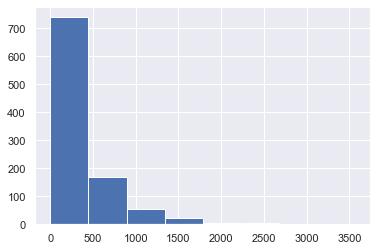

In [101]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Summarize the data about minutes spent in the classroom
def describe_data(data):
    print("Mean: ", np.mean(data))
    print("Standard Deviation: ", np.std(data))
    print("Minimum: ", np.min(data))
    print("Maximum: ", np.max(data))
    plt.hist(data, bins= 8)

total_minutes = list(total_minutes_by_account.values())
describe_data(total_minutes)

In [30]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
max_minutes

3564.7332644989997

In [31]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record["account_key"] == student_with_max_minutes:
        print (engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_c

# Lessons Completed in First Week

Mean:  1.636180904522613
Standard Deviation:  3.002561299829423
Minimum:  0
Maximum:  36


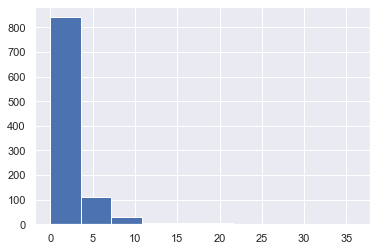

In [90]:
lesson_completed_by_account = sum_grouped_items(engagement_by_account, "lessons_completed")

total_lesson = list(lesson_completed_by_account.values())
describe_data(total_lesson)

## Number of Visits In First Week 

Mean:  2.8673366834170855
Standard Deviation:  2.2551980029196814
Minimum:  0
Maximum:  7


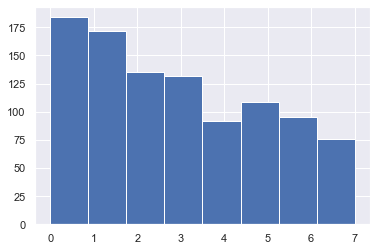

In [102]:
days_visited_by_account = sum_grouped_items(engagement_by_account, "has_visited")

total_days = list(days_visited_by_account.values())
describe_data(total_days)

## Splitting Out Passing Students 

In [34]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission["lesson_key"]
    rating = submission["assigned_rating"]
    
    if project in subway_project_lesson_keys and (rating == "PASSED" or rating == "DISTINCTION"):
        pass_subway_project.add(submission["account_key"])
        
len(pass_subway_project)

647

In [35]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record["account_key"] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the two student groups 

In [51]:
passing_engagement_by_account = group_data(passing_engagement, "account_key")

In [52]:
non_passing_engagement_by_account = group_data(non_passing_engagement, "account_key")

Mean:  394.58604648350865
Standard Deviation:  448.4995193265521
Minimum:  0.0
Maximum:  3564.7332644989997


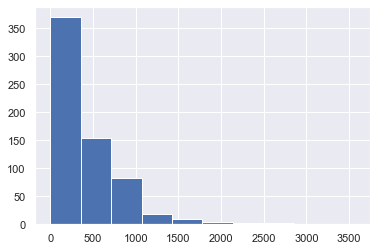

In [92]:
# Passing Engagement Total Minutes
pasing_engagement_total_minutes = sum_grouped_items(passing_engagement_by_account, "total_minutes_visited")

total_minutes = list(pasing_engagement_total_minutes.values())
describe_data(total_minutes)

Mean:  143.32647426675584
Standard Deviation:  269.5386190114951
Minimum:  0.0
Maximum:  1768.5227493319999


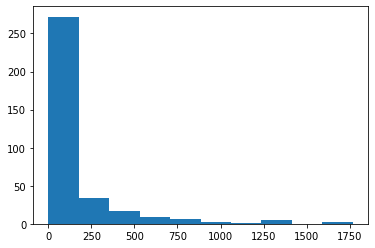

In [76]:
# Non Passing Engagement Total Minutes
non_pasing_engagement_total_minutes = sum_grouped_items(non_passing_engagement_by_account, "total_minutes_visited")

total_minutes = list(non_pasing_engagement_total_minutes.values())
describe_data(total_minutes)

In [55]:
# Passing Engagement For Lessons lesson completed
passing_engagement_lesson_completed = sum_grouped_items(passing_engagement_by_account, "lessons_completed")

total_lesson = list(passing_engagement_lesson_completed.values())
describe_data(total_lesson)

Mean:  2.052550231839258
Standard Deviation:  3.1422270555779344
Minimum:  0
Maximum:  36


Mean:  0.8620689655172413
Standard Deviation:  2.5491599418312028
Minimum:  0
Maximum:  27


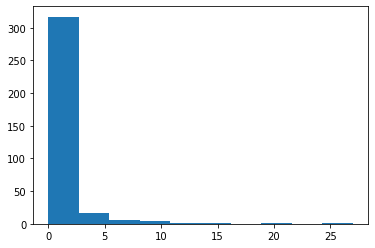

In [77]:
# Non Passing Engagement For Lessons Completed
non_passing_engagement_lesson_completed = sum_grouped_items(non_passing_engagement_by_account, "lessons_completed")

total_lesson = list(non_passing_engagement_lesson_completed.values())
describe_data(total_lesson)

Mean:  3.384853168469861
Standard Deviation:  2.2588214709184595
Minimum:  0
Maximum:  7


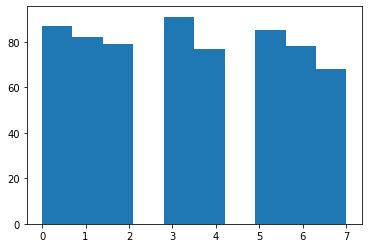

In [78]:
# Passing Engagement For Total Days visited completed
passing_engagement_days_visited = sum_grouped_items(passing_engagement_by_account, "has_visited")

total_days = list(passing_engagement_days_visited.values())
describe_data(total_days)

Mean:  1.9051724137931034
Standard Deviation:  1.9057314413619046
Minimum:  0
Maximum:  7


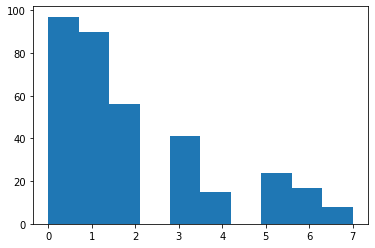

In [79]:
# Non Passing Engagement For Total Days visited completed
non_passing_engagement_days_visited = sum_grouped_items(non_passing_engagement_by_account, "has_visited")

total_days = list(non_passing_engagement_days_visited.values())
describe_data(total_days)

Mean:  0.00927357032457496
Standard Deviation:  0.1108095723581757
Minimum:  0
Maximum:  2


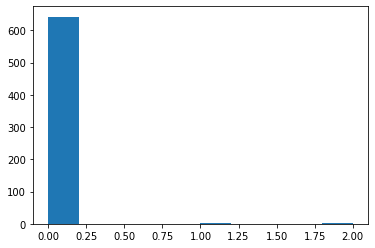

In [80]:
# Passing Engagement For Number of Project completed
passing_engagement_project_completed = sum_grouped_items(passing_engagement_by_account, "projects_completed")

total_project = list(passing_engagement_project_completed.values())
describe_data(total_project)

Mean:  0.0
Standard Deviation:  0.0
Minimum:  0
Maximum:  0


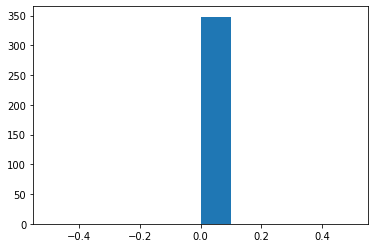

In [81]:
# Non Passing Engagement For Number of Project completed
non_passing_engagement_project_completed = sum_grouped_items(non_passing_engagement_by_account, "projects_completed")

total_project = list(non_passing_engagement_project_completed.values())
describe_data(total_project)